In [126]:
import pandas as pd
import ydata_profiling as pp
import sklearn
from matplotlib import pyplot
import numpy as np
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [127]:
df = pd.read_csv("train.csv")

In [128]:
df.isnull().sum()

RecordID                            0
hospital_id                         0
icu_id                              0
ethnicity                         576
gender                              4
icu_admit_source                   47
icu_stay_type                       0
icu_type                            0
apache_3j_bodysystem              276
apache_2_bodysystem               276
age                              1801
elective_surgery                    0
pre_icu_los_days                    0
apache_2_diagnosis                276
apache_3j_diagnosis                64
apache_post_operative               0
gcs_eyes_apache                   405
gcs_motor_apache                  405
gcs_unable_apache                  42
gcs_verbal_apache                 405
heart_rate_apache                   2
intubated_apache                    0
resprate_apache                    62
temp_apache                      1249
ventilated_apache                   0
d1_diasbp_min                       0
d1_diasbp_no

In [129]:
# Separate object columns and numeric columns
object_columns = df.select_dtypes(include=['object',]).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns


In [130]:
# Fill missing values in numeric columns with mean
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in categorical columns with mode
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [131]:
df.isnull().sum()

RecordID                         0
hospital_id                      0
icu_id                           0
ethnicity                        0
gender                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_3j_bodysystem             0
apache_2_bodysystem              0
age                              0
elective_surgery                 0
pre_icu_los_days                 0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_min                    0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_mbp_min          

In [132]:
# label_encoder = LabelEncoder()
# for col in object_columns:
#     df[col] = label_encoder.fit_transform(df[col])

ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding to the specified columns
for col in object_columns:
    df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])


In [133]:
X = df.drop(columns=['hospital_death'])
y = df['hospital_death']
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)


In [134]:
# dt_model = DecisionTreeClassifier(max_depth=7) 
# sfs = SequentialFeatureSelector(
#     dt_model, direction="forward", n_features_to_select=15, scoring="roc_auc"
# )
# sfs.fit(X, y)
# selected_features = sfs.get_feature_names_out()

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['gender', 'icu_admit_source', 'icu_stay_type', 'apache_3j_bodysystem', 'elective_surgery', 'apache_2_diagnosis', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min', 'apache_4a_hospital_death_prob']


In [135]:
# categorical , forward ,label encoding 
# selected_features = [
#     'ethnicity', 'icu_admit_source', 'icu_stay_type', 'apache_3j_bodysystem',
#     'elective_surgery', 'apache_post_operative', 'gcs_eyes_apache',
#     'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache',
#     'ventilated_apache', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
#     'd1_spo2_min', 'apache_4a_hospital_death_prob'
# ]

# categorical , forward ,ordinal encoding 
selected_features = [
    'gender', 'icu_admit_source', 'icu_stay_type', 'apache_3j_bodysystem',
    'elective_surgery', 'apache_2_diagnosis', 'apache_post_operative',
    'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'd1_mbp_min',
    'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min',
    'apache_4a_hospital_death_prob'
]


In [136]:
trainX = trainX[selected_features]
testX= testX[selected_features]

In [137]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    # return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.8547281020600899
Depth 7 Split 2  :  0.8434094177212194
Depth 5 Split 5  :  0.8547281020600899
Depth 7 Split 5  :  0.8434003702848275


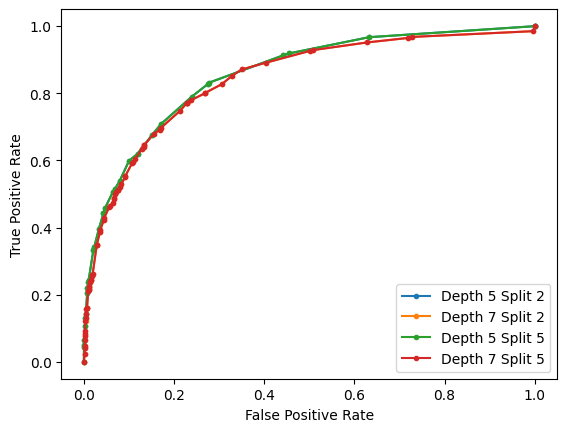

In [138]:
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") 

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [139]:
def fitting_models_CV2():
    cv = RepeatedKFold(n_splits=10, n_repeats=2)#, random_state=1)
    
    
    dt_5_2 = DecisionTreeClassifier(max_depth=5)  
    dt_7_2 = DecisionTreeClassifier(max_depth=7)  
    dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
    dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
    #kn = KNeighborsClassifier(n_neighbors=5)
    #pipe_kn = Pipeline([("scaler", MinMaxScaler()), 
    #                     ("knr", KNeighborsClassifier(n_neighbors=5))])
    clfs = [('Depth 5 Split 2', dt_5_2),        
        ('Depth 7 Split 2', dt_7_2),        
        ('Depth 5 Split 5', dt_5_5),
        ('Depth 7 Split 5', dt_7_5)
        #('KNearest Neighbor',kn),
        #('Scaled KNearest',pipe_kn)       
    ]
    for name,clf in clfs:
        start = time.perf_counter()
        #scores = cross_val_score(clf, X, y, scoring="accuracy", cv=cv) 
        scores = cross_val_score(clf, X, y, scoring="roc_auc", cv=cv, n_jobs=-1) 
        end = time.perf_counter()        
        score = format(mean(scores), '.4f')
        duration = format((end-start),'.4f')
        print("{} : {} - {}".format(name,score,duration))

In [140]:
fitting_models_CV2()

9955.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9955.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Depth 5 Split 2 : 0.8461 - 8.9437
Depth 7 Split 2 : 0.8425 - 2.0873
Depth 5 Split 5 : 0.8453 - 1.4564
Depth 7 Split 5 : 0.8395 - 2.2261


In [141]:
parameters = {     
                  'max_depth': [5, 6, 7, 8],
                 'min_samples_split': [100, 200, 300, 400]
            
                }
dt = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1, scoring='roc_auc',verbose=2)#, refit=False)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.6s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.6s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=100; total time=   0.5s
[CV] END .................max_depth=5, min_samples_split=200; total time=   0.5s
[CV] END .................max_depth=5, min_sam